Варіант 1

Контекст:

Вам надані дані про пінгвінів архіпелагу Палмер (Антарктида) у penguins_size.csv.
Дані були зібрані та надані доктором Крістен Горман і станцією Палмер, Антарктика LTER, членом Мережі довгострокових екологічних досліджень.
Файл містить змінні:
•	species: види пінгвінів (Chinstrap, Adélie або Gentoo)
•	culmen_length_mm: довжина кульмена (мм)
•	culmen_depth_mm: глибина кульмена (мм)
•	flipper_length_mm: довжина фліппера (мм)
•	body_mass_g: маса тіла (г)
•	island: назва острова (Дрім, Торгерсен або Біско) в архіпелазі Палмер (Антарктида)
•	sex: стать пінгвінів
Кульмен — це «верхня частина пташиного дзьоба» (визначення з Oxford Languages).
Завдання:
1.	Завантажте дані у проект
2.	Зробіть перевірку даних на консистентність та обробіть пропуски, якщо вони є
3.	Зробіть розвідувальний аналіз даних:
a.	побудуйте графік кількісного співвідношення даних по типах пінгвінів;
b.	візуалізуйте залежності у даних;
c.	зробіть висновки про різні види пінгвінів, виходячи з порівняння їх характеристик.


In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [143]:
df = pd.read_csv('penguins_size.csv')
df.replace('NA', np.nan, inplace=True)

In [144]:
df.dropna(subset=["sex"], axis=0, inplace=True)
df['sex'] = df['sex'].str.lower()
df.reset_index(drop=True, inplace=True)

In [145]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female


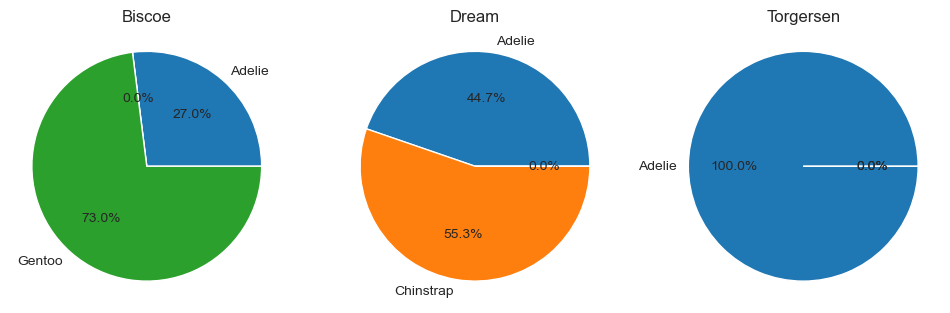

In [146]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
group_by_spec_isl = df[["species", "island", "sex"]].groupby(["species", "island"]).count().apply(
    lambda x: (100 * x / x.sum()).round(2))
group_by_spec_isl.unstack(level=1).plot.pie(ax=axes,
                                            subplots=True,
                                            legend=False,
                                            radius=1.05,
                                            autopct='%1.1f%%',
                                            wedgeprops=
                                            {
                                                'linewidth': 1,
                                                'antialiased': True,
                                            })
titles = list(dict.fromkeys(df.island.sort_values()))
for i, ax in enumerate(axes.flat):
    ax.get_yaxis().set_visible(False)
    ax.set(title=titles[i])

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44.0,55.0,47.0
Chinstrap,0.0,68.0,0.0
Gentoo,119.0,0.0,0.0


sex,female,male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


<AxesSubplot:xlabel='species'>

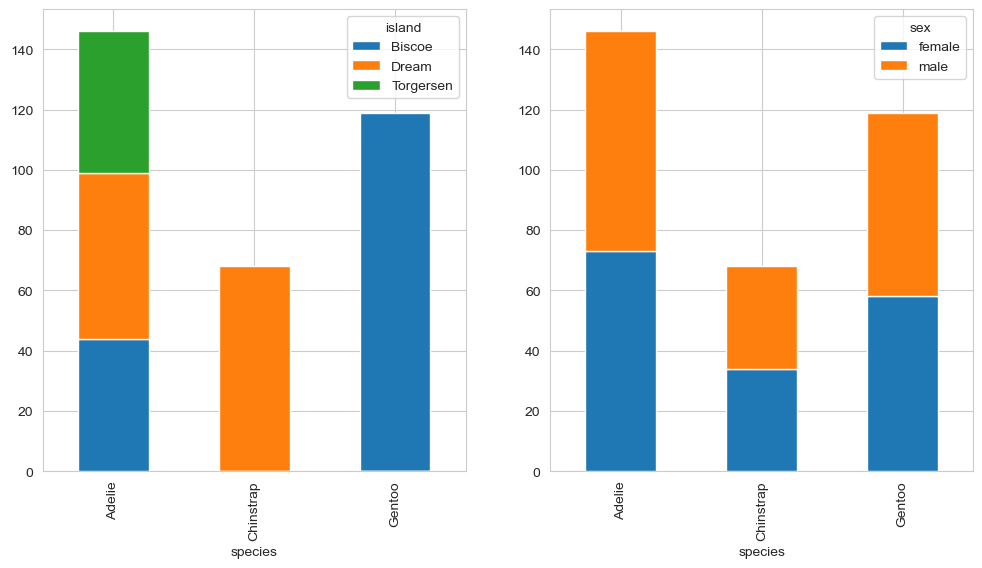

In [147]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

group_by_spec_isl_count = df.groupby(["species", "island"], as_index=False)["sex"].agg(['count']).sort_values(
    ["species", "count"])
df_task_a_2 = pd.pivot_table(group_by_spec_isl_count, columns='island', values='count', index='species').fillna(0)
display(df_task_a_2)
df_task_a_2.plot.bar(ax=axes[0], stacked=True)

group_by_spec_sex_count = df.groupby(["species", "sex"], as_index=False)["island"].agg(['count']).sort_values(
    ["species", "count"])
df_task_a_3 = pd.pivot_table(group_by_spec_sex_count, columns='sex', values='count', index='species').fillna(0)
display(df_task_a_3)
df_task_a_3.plot.bar(ax=axes[1], stacked=True)

In [148]:
df.groupby(["species", "sex"]).agg({'culmen_length_mm': ['min', 'max', 'mean'],
                                    'culmen_depth_mm': ['min', 'max', 'mean'],
                                    'flipper_length_mm': ['min', 'max', 'mean'],
                                    'body_mass_g': ['min', 'max', 'mean']})

culmen_length_mm                  culmen_depth_mm        \
                              min   max       mean             min   max   
species   sex                                                              
Adelie    female             32.1  42.2  37.257534            15.5  20.7   
          male               34.6  46.0  40.390411            17.0  21.5   
Chinstrap female             40.9  58.0  46.573529            16.4  19.4   
          male               48.5  55.8  51.094118            17.5  20.8   
Gentoo    female             40.9  50.5  45.563793            13.1  15.5   
          male               44.4  59.6  49.473770            14.1  17.3   

                            flipper_length_mm                    body_mass_g  \
                       mean               min    max        mean         min   
species   sex                                                                  
Adelie    female  17.621918             172.0  202.0  187.794521      2850.0   
          male    19.072603             178.0  210.0  192.410959      3325.0   
Chinstrap female  17.588235             178.0  202.0  191.735294      2700.0   
          male    19.252941             187.0  212.0  199.911765      3250.0   
Gentoo    female  14.237931             203.0  222.0  212.706897      3950.0   
          male    15.718033             208.0  231.0  221.540984      4750.0   

                                       
                     max         mean  
species   sex                          
Adelie    female  3900.0  3368.835616  
          male    4775.0  4043.493151  
Chinstrap female  4150.0  3527.205882  
          male    4800.0  3938.970588  
Gentoo    female  5200.0  4679.741379  
          male    6300.0  5484.836066